# Homework 1
- 2019/07/01
- 統計111 李艾霓

### Part (a)：從Kaggle中找一個資料集，描述此資料相關資訊

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### • 問題定義
　　這個資料集中，主要的問題是<font color='red'>預測銀行客戶是否會離開（Exited）</font>，而我們有的columns如下：
- RowNumber 相當於每個row的index，不具意義
- CustomerId 每位客戶獨有的id，亦不具意義
- Surname 客戶的姓氏
- CreditScore 信用評分，分數越高表示客戶有越好的銀行行為
- Geography 地區
- Gender 性別
- Age 年齡
- Tenure 客戶擁有的不動產
- Balance 銀行帳戶中的存款
- NumOfProducts 金融商品數
- HasCrCard 是否有信用卡
- IsActiveMember 是否為活躍會員
- EstimatedSalary 估計的薪水
- Exited 最終是否離開銀行


### • 潛在問題
1. 這份資料確切的來源其實並不是很明確，是否真實可信須持保留態度。
2. 對於「離開」沒有一個確切的定義。
3. 資料蒐集的時間無從得知，是在某一時間點下蒐集了全部的資料，或是客戶進入銀行後一段固定時間後蒐集資料，這之間有些不同。
4. 資料集內「未離開」的客戶是否可能是在未來離開？

上述幾點都影響了我們該如何看待這份資料，但資訊不夠完整。


### • 分析與預測難度

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

資料完全沒有缺失值是這個資料集的一個優點。

In [23]:
# 處理非數值資料
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df = pd.get_dummies(df)

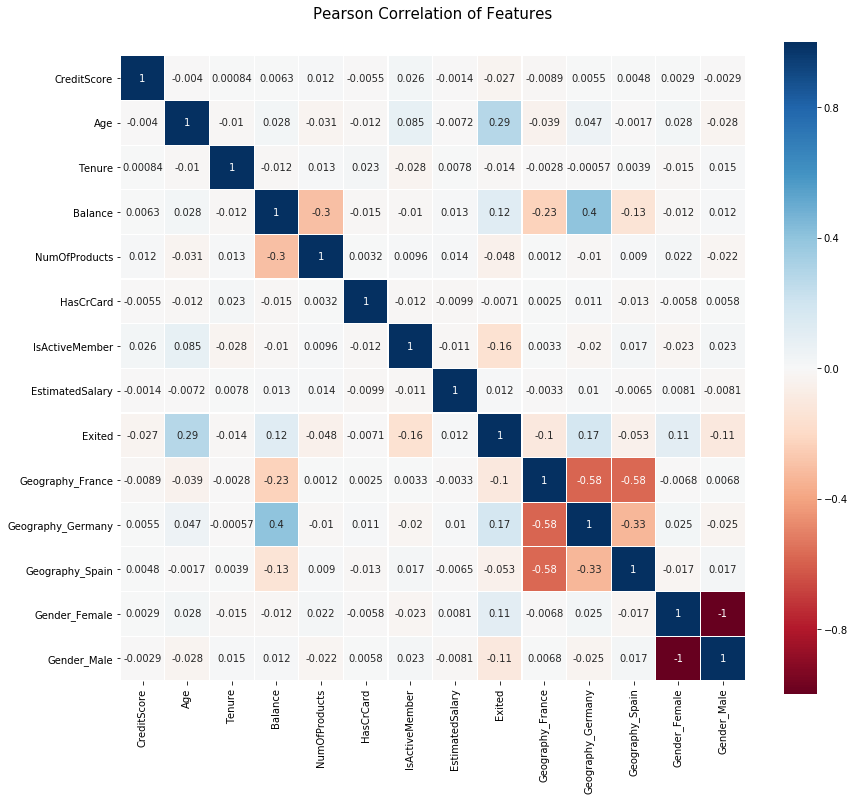

In [25]:
# 相關係數圖
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

看起來'Exited'與其他欄位的相關都不大，**猜測並不容易預測**。


### • 價值
　　若能夠準確預測客戶是否會離開銀行，那麼銀行就有機會能夠及時採取行動，在客戶真正流失之前，以一些手段挽留住那些很有可能即將離開的客戶，使銀行損失降低，相信這具有非常大的商業價值。




### Part (b)：描述一個在你學習領域的資料或是日常生活中可取得的資料, 說明可以用來產生何種價值
　　